In [23]:
#Importing all relevant libraries

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import tensorflow as tf

### About the dataset
The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. 

* Each row is a separate image
* 785 columns
* First column = class_label (the target variable)
* Each column after represents one pixel value (784 total for a 28 x 28 image)

In [24]:
#Reading using pandas
train_df = pd.read_csv('../archive/emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print(train_df.shape)

(112800, 785)


In [26]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


We have 112800 rows (images), each described using 784 variables 28X28 pixels plus one column as output variable (the first column)



### Creating label dictionary

The output variables' values comprise of 0 to 46 values where 0-9 stands for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stand for lowercase alphabets. We will thus create a dictionary which will have these as key and value pairs.

In our dataset, there is a file emnist-balanced-mapping which contains the characters and their ASCII equivalents. We can have the index column as the key of the dictionary and the value ASCII code converted to char as the value of the dictionary.

In [27]:
#Reading the file
label_map = pd.read_csv("../archive/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None)
label_map.head()

,1
0,
0,48
1,49
2,50
3,51
4,52


In [28]:
#Initialising an empty dictionary
label_dictionary = {}

#Running a loop for ASCII equivalent to character conversion
for index, label in label_map.iterrows():
    label_dictionary[index] = chr(label)

label_dictionary

C:\Users\LeKien\AppData\Local\Temp\ipykernel_10988\243772673.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  label_dictionary[index] = chr(label)
C:\Users\LeKien\AppData\Local\Temp\ipykernel_10988\243772673.py:6: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label_dictionary[index] = chr(label)


{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

My area of interst is only the Hand Writing Recognition of Numbers and Block letters. Thus dropping the lowercase characters from the dataset.

In [29]:
train_df_new = train_df[train_df[0].isin(np.arange(0, 36))]
train_df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x_train = train_df_new.loc[:, 1:]
y_train = train_df_new.loc[:, 0]

x_train.values[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        17,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Visualize sample

In [31]:
sample_image = x_train.iloc[1000]
sample_label = y_train.iloc[1000]
sample_image.shape, sample_label

((784,), np.int64(19))

Label entry No. 1000: J


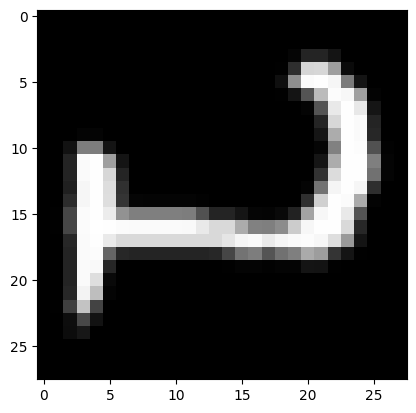

In [32]:
W = 28
H = 28

print("Label entry No. 1000:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

It is quite visible that the image is rotated anticlockwise 90 degrees and flipped as well. We will thus define a function to rotate and flip and see if it works on the sample image.

Label entry 1000: J


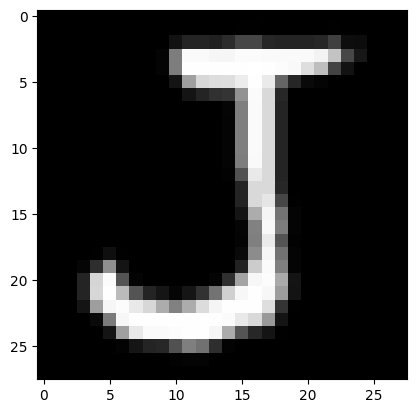

In [33]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 1000:", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

In [34]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train = x_train.reshape(-1, 784)
x_train = x_train.astype('float32') / 255
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00784314, 0.03529412, 0.1254902 , 0.01176471, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13333334, 0.6666667 , 0.87058

In [35]:
# Split 20% test 
X_train, X_test, Y_train, Y_test = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size= 0.2, 
                                                  random_state=0)

In [36]:
X_train.shape, X_test.shape

((69120, 784), (17280, 784))

In [37]:
#Finding the number of output columns
number_of_classes = Y_train.nunique()
number_of_classes

36

In [38]:
def onehotencoding(y):
    y_one = np.zeros((y.shape[0], number_of_classes))
    for i, label in enumerate(y):
        y_one[i, label] = 1
    return y_one

Y_train = onehotencoding(Y_train)
Y_train.shape

(69120, 36)

In [17]:
Y_train.shape, Y_test.shape

((69120, 36), (17280,))

In [18]:
class SoftmaxRegression:
    def __init__(self,lr=0.01,epochs=100,batch_size=64):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.w = None
        self.loss_list = None
        
    def sofmax (self,z):
        e_z = np.exp(z)
        return e_z/e_z.sum(axis=1,keepdims=True)

    def predict(self,X):
        return self.sofmax(np.dot(X,self.w))

    def loss(self,X,y):
        y_pred = self.predict(X)
        return -np.sum(y*np.log(y_pred))/len(y)

    def mini_batch_gradient_descent(self,X,y):
        for epoch in range(self.epochs):
            for i in range(0,len(X),self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                y_pred = self.predict(X_batch)
                self.w = self.w - self.lr*np.dot(X_batch.T,y_pred-y_batch)/len(X_batch)
            self.loss_list.append(self.loss(X,y))

    def fit(self,X,y):
        X = np.hstack((X,np.ones((X.shape[0],1))))
        self.w = np.random.randn(X.shape[1],y.shape[1])
        self.loss_list = []
        self.mini_batch_gradient_descent(X,y)

    def evaluate(self,X,y):
        X = np.hstack((X,np.ones((X.shape[0],1))))
        y_pred = self.predict(X)
        y_pred = np.argmax(y_pred,axis=1)
        print('accuracy: ',np.sum(y_pred==y)/len(y))
        cm = confusion_matrix(y,y_pred)
        print(cm)
        sns.heatmap(cm,annot=True,fmt='d')
        plt.show()
        return y_pred

In [19]:
model = SoftmaxRegression(0.01, 1000, batch_size=64)
model.fit(X_train, Y_train)

accuracy:  0.7229745370370371
[[282   0   0 ...   1   0   2]
 [  0 263   1 ...  11   2   0]
 [  0   0 310 ...   1   0  56]
 ...
 [  0   4   5 ... 327  22   7]
 [  2  11   0 ...  12 296   1]
 [  0   0  66 ...  16   4 322]]


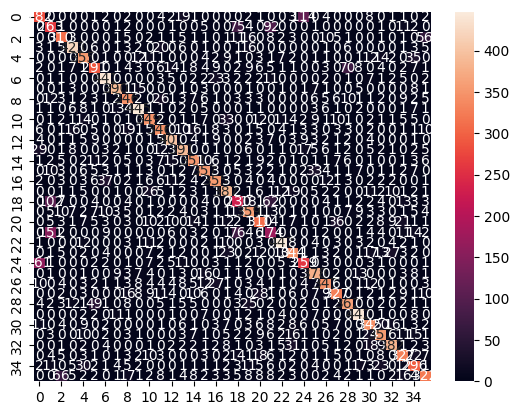

[35 23  6 ... 18  7 14]


In [20]:
label_pred = model.evaluate(X_test,Y_test)
print(label_pred)

In [21]:
import joblib

joblib.dump(model, 'log_model.sav')


['log_model.sav']

# Preprocess for CNN model

In [1]:
x_train = x_train.reshape(-1, W, H, 1)
x_train.shape

NameError: name 'x_train' is not defined

In [ ]:
y_train.shape

In [ ]:
# Split 10% validation 
X_train, X_val, Y_train, Y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=0)

In [ ]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

### Model Building

In [38]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [39]:
# Optimizing Algorithm for Backpropagation

optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [41]:
#Model Fitting

history = model.fit(X_train,
                    Y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/20
2187/2187 [==============================] - 6s 3ms/step - loss: 0.2393 - accuracy: 0.9075 - val_loss: 0.2747 - val_accuracy: 0.8989

Epoch 00001: val_loss improved from 0.30284 to 0.27474, saving model to my_model.h5
Epoch 2/20
2187/2187 [==============================] - 6s 3ms/step - loss: 0.2111 - accuracy: 0.9161 - val_loss: 0.2800 - val_accuracy: 0.8975

Epoch 00002: val_loss did not improve from 0.27474
Epoch 3/20
2187/2187 [==============================] - 6s 3ms/step - loss: 0.1890 - accuracy: 0.9224 - val_loss: 0.3103 - val_accuracy: 0.8948

Epoch 00003: val_loss did not improve from 0.27474
Epoch 4/20
2187/2187 [==============================] - 6s 3ms/step - loss: 0.1717 - accuracy: 0.9290 - val_loss: 0.2786 - val_accuracy: 0.9035

Epoch 00004: val_loss did not improve from 0.27474
Epoch 5/20
2187/2187 [==============================] - 6s 3ms/step - loss: 0.1606 - accuracy: 0.9329 - val_loss: 0.2942 - val_accuracy: 0.9026

Epoch 00005: val_loss did not improve 

In [42]:
val_acc = model.evaluate(X_val, Y_val)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

270/270 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9083
Loss value is  0.293573260307312
Accuracy value is  0.9083333611488342


In [30]:
# Load best model
model = load_model('/kaggle/working/my_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

# **Testing on new image**

In [43]:
import cv2
import numpy as np

# read image file
# convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255 - gray
# resize image to 28x28 pixels
gray_resized = cv2.resize(gray, (28, 28))

# reshape image to ( , 28, 28, 1)
gray_reshaped = gray_resized.reshape(1, 28, 28, 1)

# display shape of reshaped image
print(gray_reshaped.shape)  # should output (1, 28, 28, 1)

error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
plt.imshow(gray_reshaped[0], cmap=plt.cm.gray)

In [ ]:
#Prediction
y_pred_test1 = model.predict(gray_reshaped)
# Finding shape
y_pred_test1.shape

In [ ]:
label_dictionary[y_pred_test1.argmax()]

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(gray_reshaped[0], cmap=plt.cm.gray)
plt.title(label_dictionary[y_pred_test1[0].argmax()])

In [12]:
import cv2
import numpy as np

# read image file
# convert image to grayscale
img = cv2.imread('img/char_k.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255 - gray
# resize image to 28x28 pixels
gray_resized = cv2.resize(gray, (28, 28))

# reshape image to ( , 28, 28, 1)
gray_reshaped = gray_resized.reshape(1, 28, 28, 1)

# display shape of reshaped image
print(gray_reshaped.shape)  # should output (1, 28, 28, 1)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
